# Лабораторна робота №1

Автори оригінальної лабараторної невідомі. Автор видозміненої - Іван Зарицький

# Перетворення Фур'є

На парах математичного аналізу ви познайомилися з **рядами Фур'є** - інструментом, який дозволяє довільну періодичну функцію оцінити як рівномірно збіжний ряд з тригонометричних функцій. У цій роботі ми познайомимось з дотичним і дуже потужним інструментом - **дискретним перетвореннями Фур'є**.

Говорячи науково, перевторення Фур'є - це переклад неперервного сигналу (хвилі) з формату "час-амплітуда" (**time domain**), де для кожної одиниці часу ми записуємо "гучність" хвилі, у формат "частота-амплітуда" (**frequency domain**), де ми маємо різні частоти, для кожної з якої знаємо її "гучність" у вихідному сигналі.

### **Матеріали:**</br>
Потрібно для виконання лаби:
- 3blue1brown (Fast Fourier Transform) - https://www.youtube.com/watch?v=spUNpyF58BY
- https://medium.com/towards-data-science/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

Погратися:
- https://prajwalsouza.github.io/Experiments/Fourier-Transform-Visualization.html
- https://www.jezzamon.com/fourier/index.html

Additional:
- 3blue1brown (ряди фур’є) - https://www.youtube.com/watch?v=r6sGWTCMz2k&t=8s
- How shazam works? - https://medium.com/@anaharris/how-does-shazam-work-d38f74e41359
- Тут можна створити хвилю і послухати звук: https://www.mathsisfun.com/physics/audio-spectrum-beats.html
- Deep learning for audio intro: https://www.youtube.com/watch?v=Z7YM-HAz-IY&list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P

For nerds:
- https://www.youtube.com/watch?v=E8HeD-MUrjY

In [ ]:
import librosa
from librosa import display
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftp
from scipy.fft import fft, fftfreq
import seaborn as sns
sns.set()

### Трохи прикладів

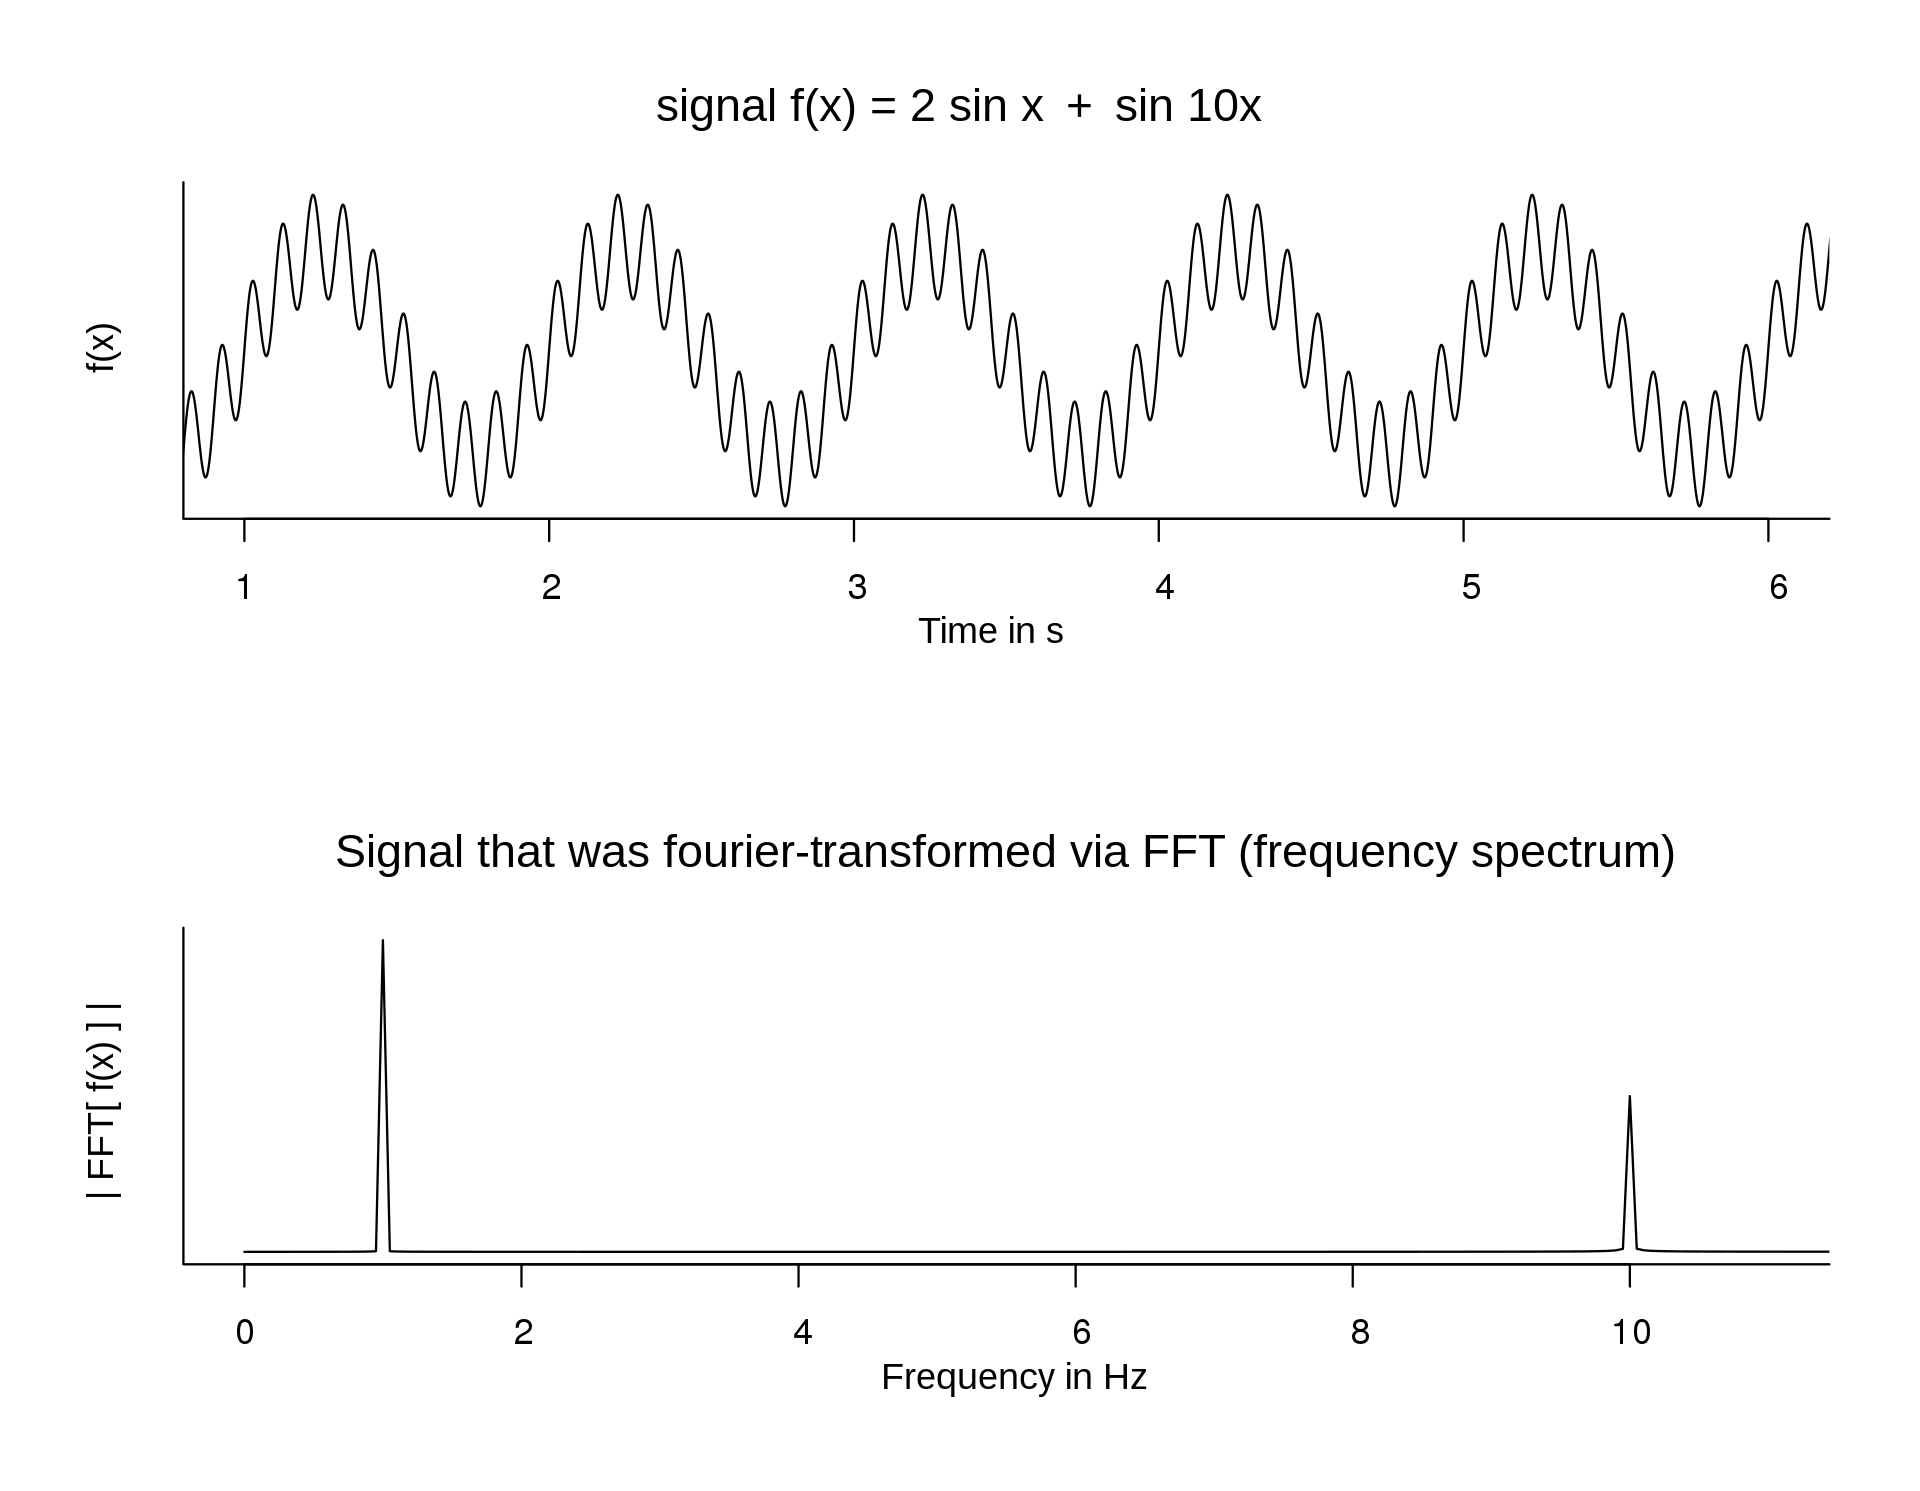

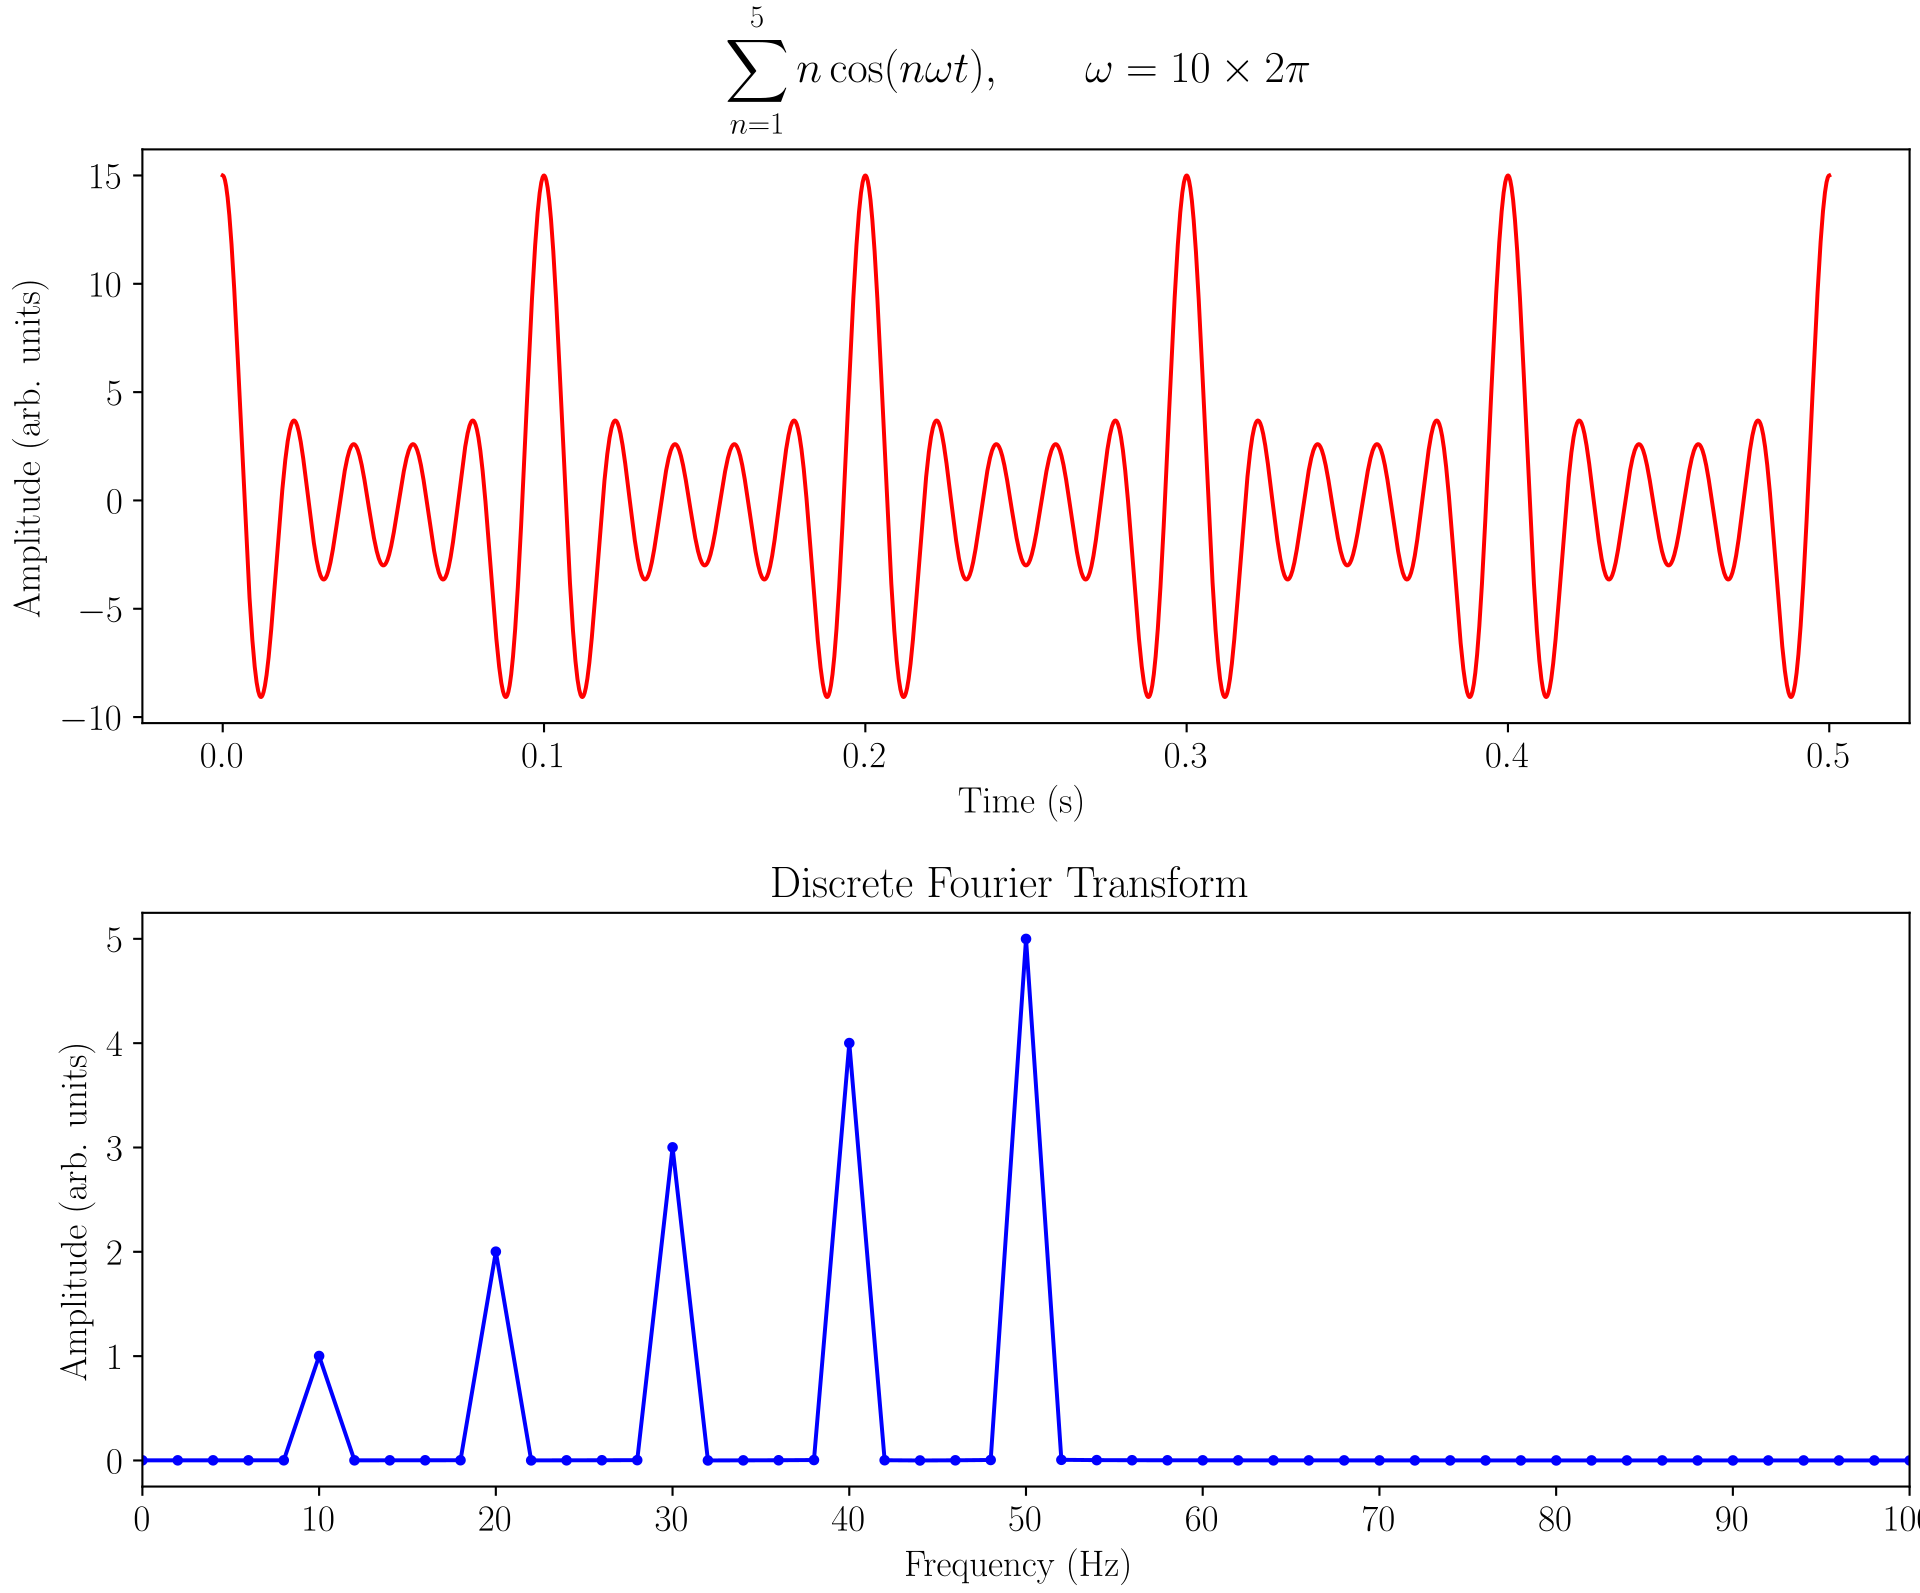

FFT (*Fast Fourier Transform*) - алгоритм для отримання перетворення Фур'є. Головна його перевага - він **скорочує асимптотичну складність** аналізу з $O(N^2)$ до $O(N\log N)$. Наприклад, на двох масивах розміром у 100к елементів, функція np.convolve(arr1, arr2), яка використовується для пошуку накладання сигналів, працює всередньому близько 5 секунд, а scipy.signal.fftconvolve(arr1, arr2) - **у тисячу разів швидше** - ~5 мікросекунд. Ще одна демонстрація того, наскільки впливова асимптотична складність

**Приклад як працює дискретне перетворення Фур'є:**

Тут ми зобразили суму двох хвиль-cинусоїдів.

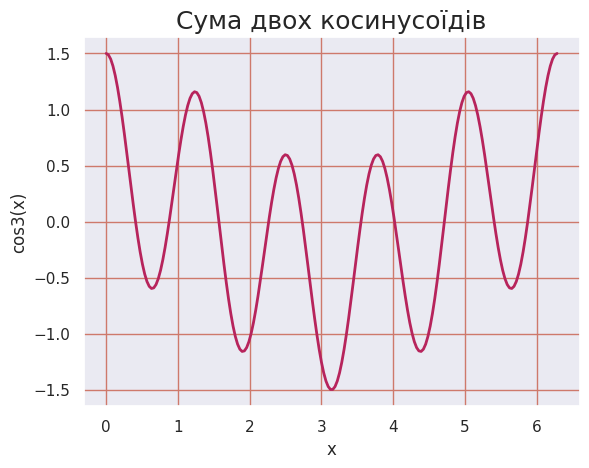

In [ ]:
T_cos3 = 2 * np.pi
N_cos3 = 200
x = np.linspace(0, T_cos3, N_cos3)
dt_cos3 = np.diff(x)[0]
cos1 = 0.5 * np.cos(x)
cos2 = np.cos(5*x)
cos3 = cos1 + cos2
plt.plot(x, cos3, color='#b7245c',
     linewidth=2)
plt.title('Сума двох косинусоїдів', fontsize=18)
plt.xlabel("x")
plt.ylabel("сos3(x)")
plt.grid(color='#ce796b')
plt.show()

Як можна побачити хвиля достатньо хаотична та не несе жодної важливої інформації.

Але ми можемо використати FFT, щоб зробити декомпозицію нашої хвилі та отримати важливу інформацію для нас, особливо про її "піки".

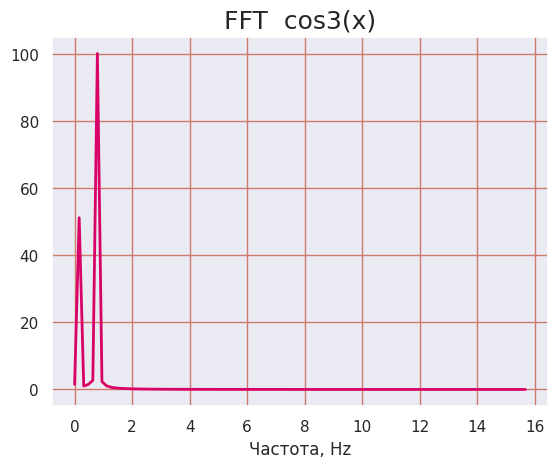

In [ ]:
cos3_freq = fftfreq(N_cos3, dt_cos3)
cos3_fft = fft(cos3)
plt.plot(cos3_freq[:N_cos3//2], np.abs(cos3_fft[:N_cos3//2]), color='#d90368',linewidth=2)
plt.title("FFT  cos3(x)", fontsize=18)
plt.xlabel("Частота, Hz")
plt.grid(color='#ce796b')
plt.show()

Matplotlib дає зручну можливість наближати графіки - тож можна краще розгледіти "піки" - найгучніші частоти оригінального запису

### Робота з аудіофайлами

В архіві прикріпленому до завдання знаходиться 3 аудіофайли, першим ділом потрібно загрузити один з цих файлів (або взяти свій) і вивести кількість семплів та sampling rate. Для цього скористайтеся python бібліотекою - librosa.

Тепер знайдіть тривалість аудіофайлу в секундах поділивши кількість семплів на sampling rate

Аудіофайл можна слухати в notebook за допомогою функції Audio імпортованої вище

Ми отримали амплітуди (samples) та частоту дискретизації(sample rate) з librosa. Ми можемо легко побудувати графік залежності цих амплітуд від часу. Приклад: 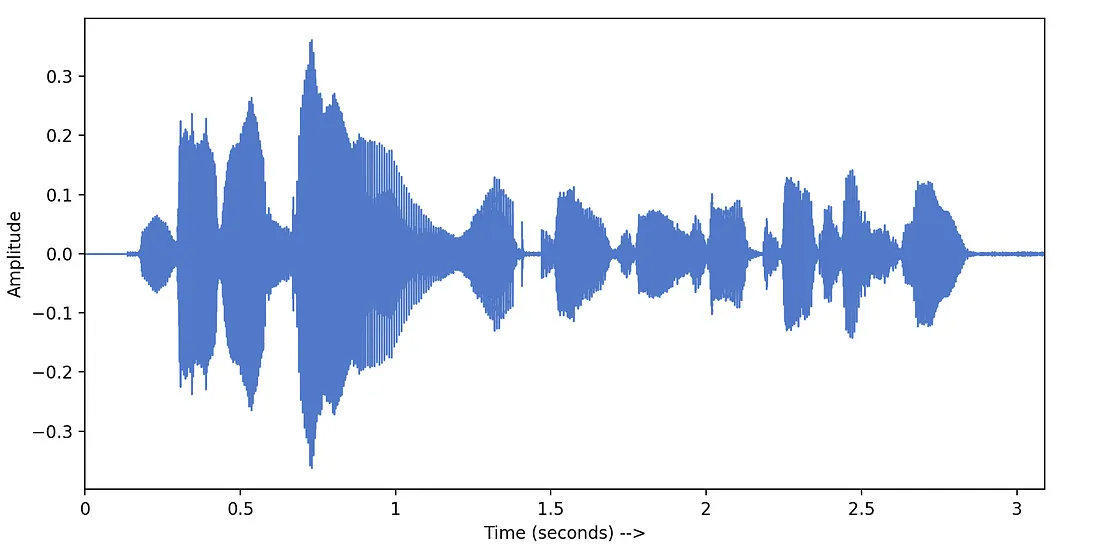

Графік залежності амплітуди від часу фактично показує гучність в певний момент часу. Але він не є дуже інформативним, бо ніяким чином не показує частотну характеристику звуку. Тут нам на допомогу приходить fft. Завдання - зробити fast fourier transform нашого audio файлу і вивести графік.</br>
Має бути щось типу такого:
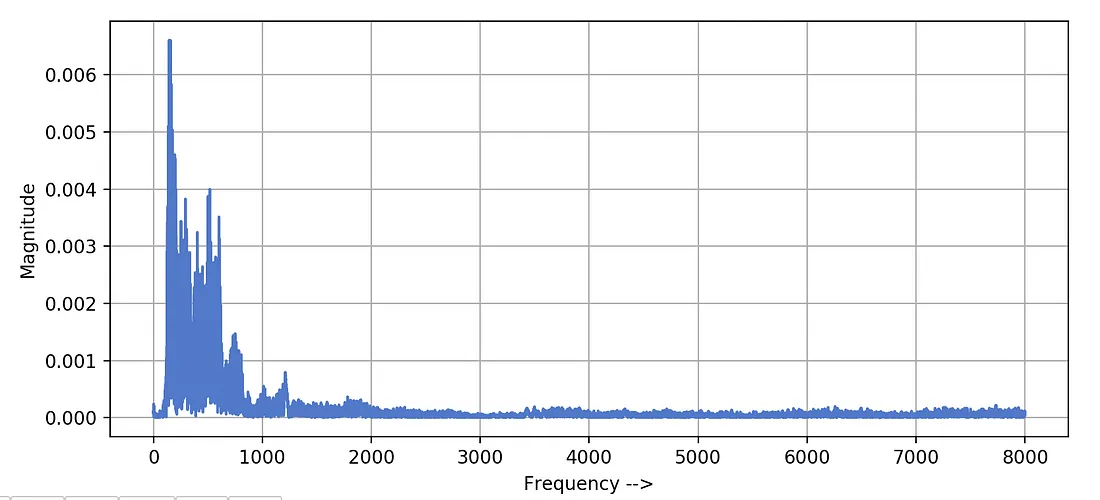

# Мета роботи та аналіз

Експерименти з аудіо: Частота та Амплітуда

Проведіть два типи тестів на різних файлах (голос, фрагмент пісні):

    Фільтрація за частотою: Виріжте окремі частоти (низькі/високі), а потім спробуйте "зібрати" файл назад.

    Фільтрація за амплітудою: Відсійте звук за гучністю (наприклад, приберіть усе, що тихше певного рівня).

Мета аналізу:
Визначити, скільки інформації можна "викинути", щоб звук залишився впізнаваним.

Приклад висновку:

    «З’ясував, що з голосу можна прибрати частоти [X], і він майже не зміниться.
    Або: пісню можна впізнати навіть при сильному урізанні амплітуди, орієнтуючись лише на ритм».

Проведіть схожий аналіз для фотографій (для цього буде корисною функція fft2). Спробуйте скомпресувати фото, поступово видаляючи з нього найменші амплітуди. Проаналізуйте, як це впливає на розмір (KiB/MiB) фото.